In [1]:
import sys
sys.path.append(".")


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tscs.grid_flatloop import load_and_preprocess_audio, run_simulation


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tscs.grid_flatloop import load_and_preprocess_audio, run_simulation
import glob
import os

# Load all .wav files from the /data directory, excluding any in the list above
base = "data"
file_list = [
    f for f in glob.glob(os.path.join(base, "*.wav"))
    if os.path.basename(f) not in exclude
]

# Format filenames into labeled dictionary for consistent labeling
files = {}
for path in sorted(file_list):
    label = os.path.splitext(os.path.basename(path))[0].replace("_", " ").title()
    files[label] = path


🔄 Processing: Human
✅ Saved: plots/human_final_collapse.png


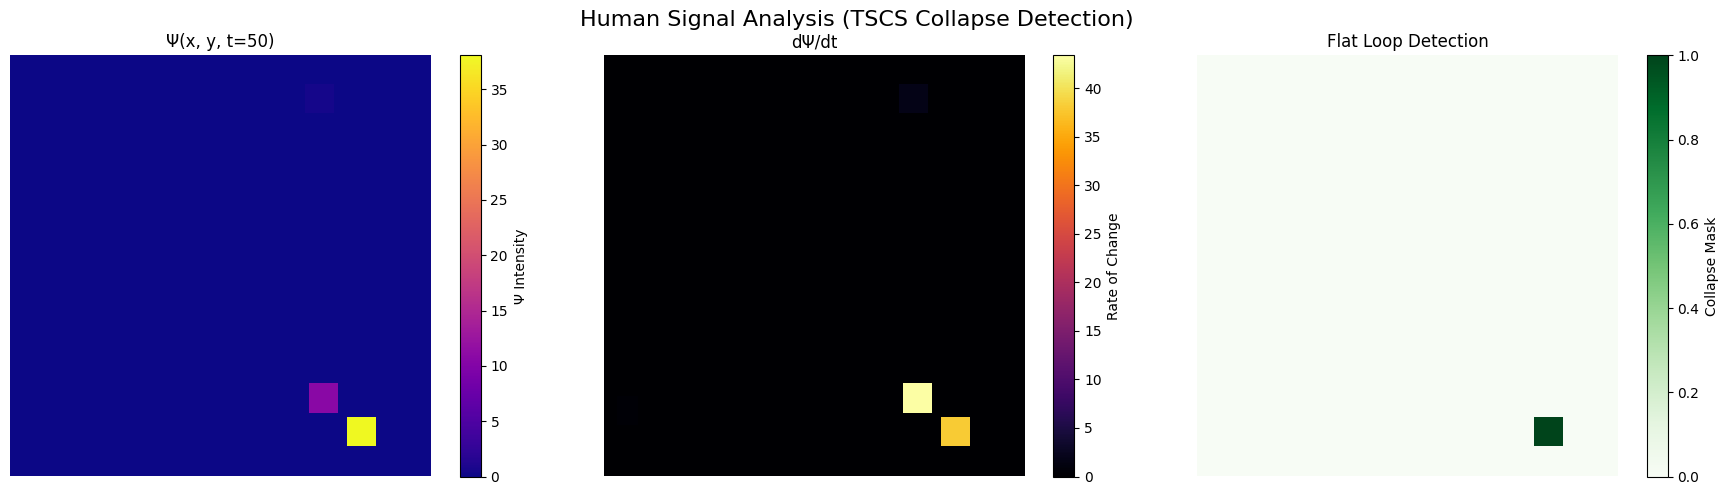

🔄 Processing: Seismic Tremor
✅ Saved: plots/seismic_tremor_final_collapse.png


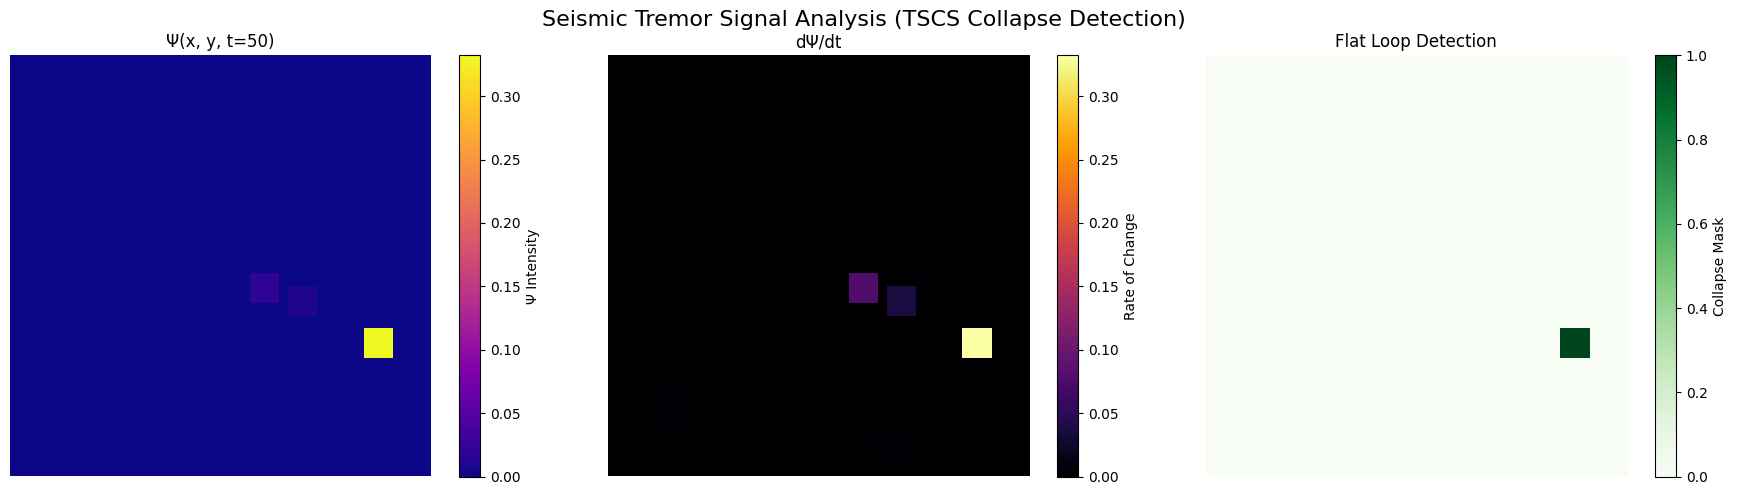

🔄 Processing: Solar Flare 1
✅ Saved: plots/solar_flare_1_final_collapse.png


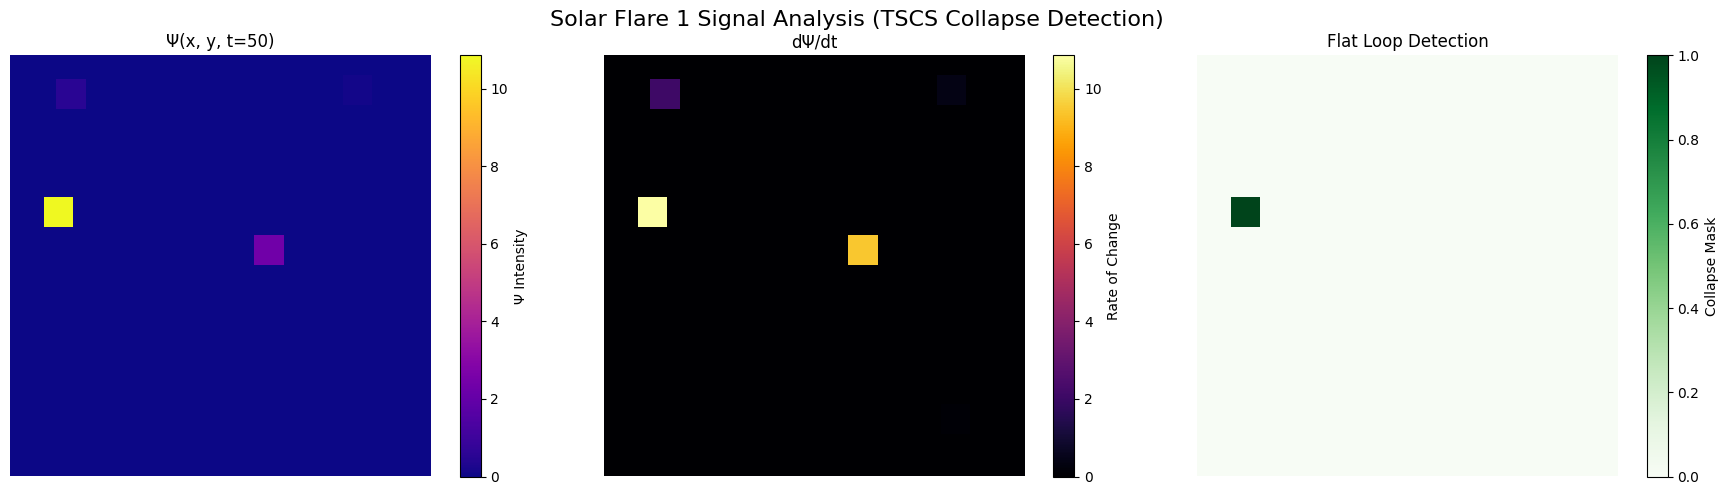

🔄 Processing: Solar Flare 2
✅ Saved: plots/solar_flare_2_final_collapse.png


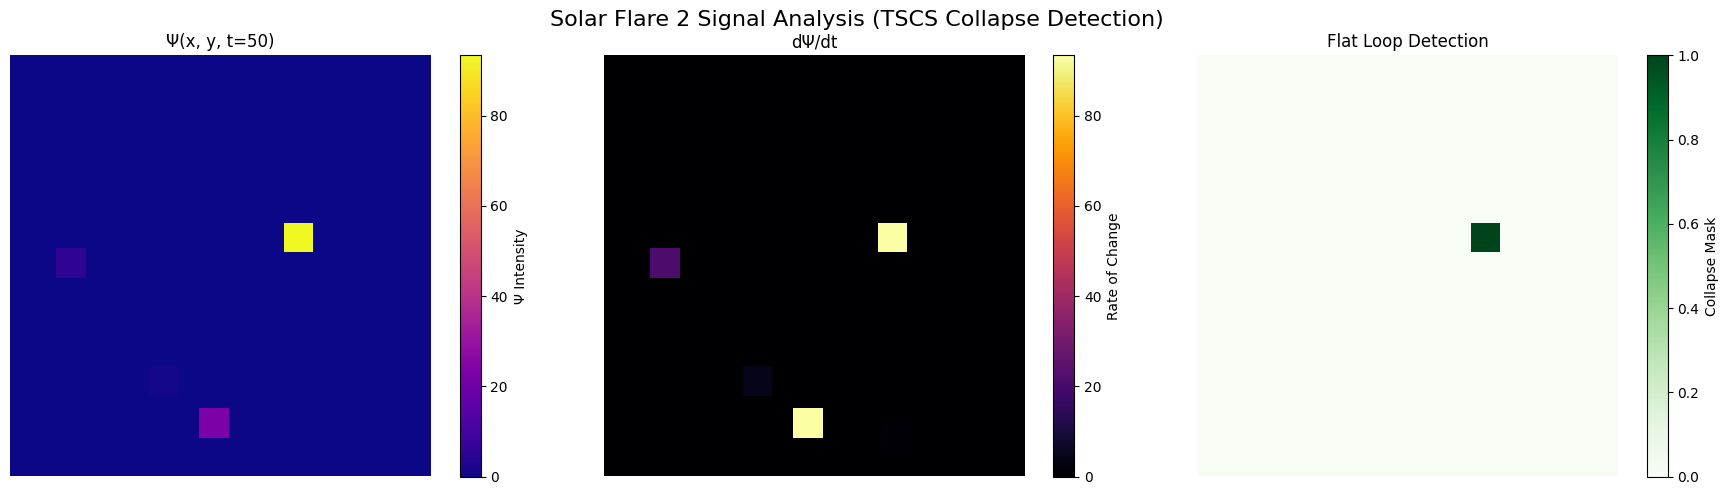

🔄 Processing: White Noise
✅ Saved: plots/white_noise_final_collapse.png


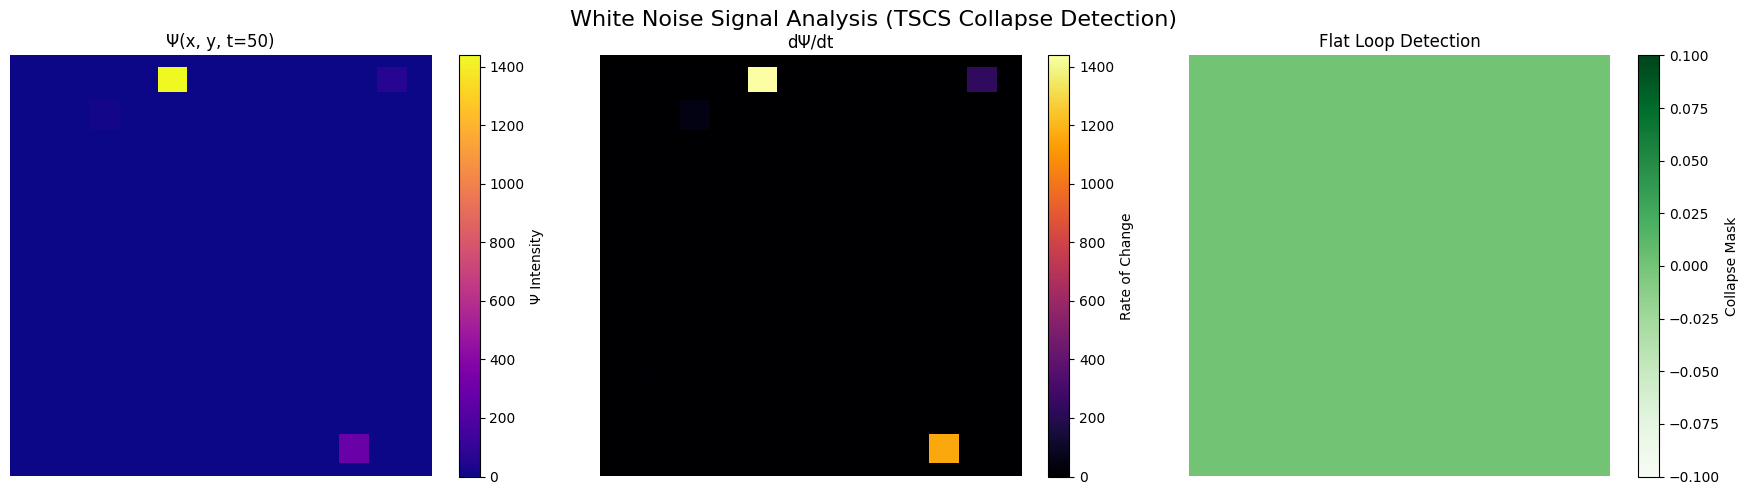

In [14]:
for label, path in files.items():
    if not os.path.exists(path):
        print(f"⚠️ Skipping {label} — file not found at {path}")
        continue

    print(f"🔄 Processing: {label}")
    energy_series, sr = load_and_preprocess_audio(path)

    # 🧠 Final tuned thresholds
    Ψ, flat_loop_mask = run_simulation(
        energy_series,
        delta1=200,   # Lower dΨ/dt = more stillness required
        delta2=0.01   # Higher energy required to count
    )

    t = 50  # Midpoint timestep for analysis
    dΨ_dt_field = np.abs(Ψ[:, :, t] - Ψ[:, :, t - 1])

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"{label} Signal Analysis (TSCS Collapse Detection)", fontsize=16)

    axs[0].imshow(Ψ[:, :, t], cmap='plasma')
    axs[0].set_title(f'Ψ(x, y, t={t})')
    axs[0].axis('off')
    plt.colorbar(axs[0].images[0], ax=axs[0], label='Ψ Intensity')

    axs[1].imshow(dΨ_dt_field, cmap='inferno')
    axs[1].set_title('dΨ/dt')
    axs[1].axis('off')
    plt.colorbar(axs[1].images[0], ax=axs[1], label='Rate of Change')

    axs[2].imshow(flat_loop_mask[:, :, t], cmap='Greens')
    axs[2].set_title('Flat Loop Detection')
    axs[2].axis('off')
    plt.colorbar(axs[2].images[0], ax=axs[2], label='Collapse Mask')

    plt.tight_layout()
    out_path = f"plots/{label.lower().replace(' ', '_')}_final_collapse.png"
    plt.savefig(out_path)
    print(f"✅ Saved: {out_path}")
    plt.show()




📂 Plots in /plots/:
- human_final_collapse.png
- seismic_tremor_final_collapse.png
- solar_flare_1_final_collapse.png
- solar_flare_2_final_collapse.png
- white_noise_final_collapse.png
